In [1]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score,f1_score
import seaborn as sn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
date = pd.read_csv("date/reviews_mixed.csv",delimiter=",")

date_X = date[date.columns[0]].tolist()

date_Y = date[date.columns[1]].tolist()
date_Y = [1 if el=="positive" else 0 for el in date_Y]

date[:5]

,Text,Sentiment
0,"The rooms are extremely small, practically onl...",negative
1,Room safe did not work.,negative
2,Mattress very comfortable.,positive
3,"Very uncomfortable, thin mattress, with plasti...",negative
4,No bathroom in room,negative


In [3]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

train_X_embeded = sbert_model.encode(date_X)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
class KMeans:
    def __init__(self, n_clusters, max_iter=500, k=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.k = k

    def fit(self, X):
        # Randomly initialize the centroids
        initial_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            distances = cdist(X, self.centroids, 'euclidean')
            self.labels = np.argmin(distances, axis=1)
            
            # Compute new centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.k):
                break
            
            self.centroids = new_centroids
        
    def predict(self, X):
        distances = cdist(X, self.centroids, 'euclidean')
        return np.argmin(distances, axis=1)

Accuracy:  0.15458937198067632
f1:  0.09326424870466321


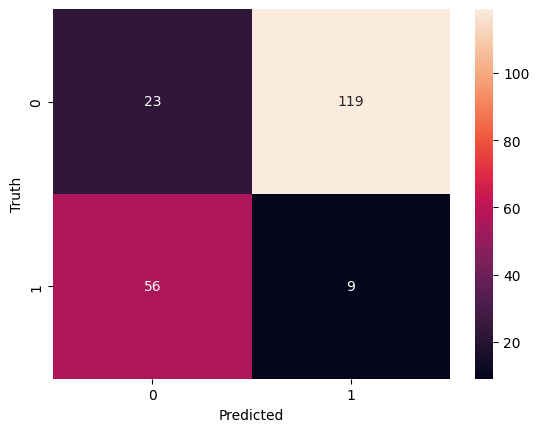

In [5]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_X_embeded)

print("Accuracy: ", accuracy_score(date_Y, kmeans.labels))
print("f1: ", f1_score(date_Y, kmeans.labels))


cm = confusion_matrix(date_Y, kmeans.labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()